In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage
import cv2
import glob
import pandas as pd
import joblib

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, UpSampling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage import data, io,color
from skimage.io import imread_collection #loads a collection of images
from skimage.io import imread, imshow
from pathlib import Path

from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt

## Debugging pca_rgb done!

In [5]:
def pca_rgb(imgBGR, size): # imgRGB, size
    b,g,r = cv2.split(imgRGB)
    list_channels = [b,g,r]
    
    #check size first
    if size ==1:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 300)
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        rgb_compressed = cv2.merge(inverted_img)    

    elif size == 2:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 400)
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        rgb_compressed = cv2.merge(inverted_img)
    else:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 500)
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        rgb_compressed = cv2.merge(inverted_img)

    return rgb_compressed

In [6]:
img_path = "C:/Study/Semester2/Machine Learning/ML_images/Training/slim1.jpg"

In [7]:
imgRGB = cv2.imread(img_path)

In [8]:
imgRGB.shape

(471, 700, 3)

In [9]:
imgBGR = np.flip(imgRGB, -1)

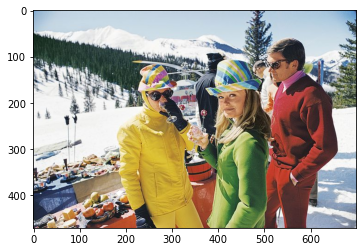

In [10]:
plt.imshow(imgBGR) # flip for reading it 

In [ ]:
#Feed BGR to rgb_pca()

In [11]:
SIZE = 1
RGB_compressed = pca_rgb(imgBGR, SIZE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


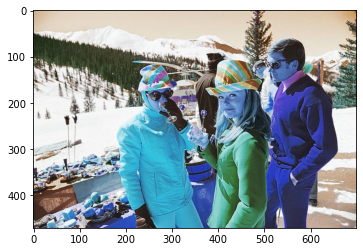

In [12]:
plt.imshow(RGB_compressed)

In [13]:
#flip after compressed for readibility
RGB_compressed = np.flip(RGB_compressed,-1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


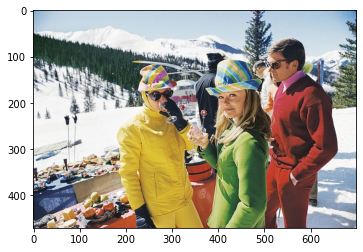

In [14]:
plt.imshow(RGB_compressed)

In [ ]:
RGB_compressed.shape

In [ ]:
RGB_compressed = np.float32(RGB_compressed) #RGB_compressed*255
#RGB_compressed = RGB_compressed*255 #

In [ ]:
RGB_compressed[0][0]

In [ ]:
plt.imshow(RGB_compressed) #RGB_compressed.astype('float32')
#plt.imshow(RGB_compressed.astype('int32')) #alternative for eliminate clipping warning // okay it doesn't eliminatte

## Debugging pca_rgb() Test

In [7]:
def pca_rgb(imgBGR, size): #imgRGB, size
    b,g,r = cv2.split(imgBGR)
    list_channels = [b,g,r]
    
    #check size first
    if size ==1:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 300) #100
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        RGB_compressed = cv2.merge(inverted_img)    

    elif size == 2:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 400) #400
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        RGB_compressed = cv2.merge(inverted_img)
    else:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 500)
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        RGB_compressed = cv2.merge(inverted_img)
    #RGB_compressed = np.flip(RGB_compressed,-1)
    RGB_compressed = np.float32(RGB_compressed)
    print(RGB_compressed[0][0], RGB_compressed[0][0].dtype, )
    return RGB_compressed

In [8]:
img_path = "C:/Study/Semester2/Machine Learning/ML_images/Training/slim1.jpg"
imgRGB = cv2.imread(img_path)
imgBGR = np.flip(imgRGB, -1)

In [30]:
test_compressed = pca_rgb(imgBGR, 1)
test_compressed = np.clip(test_compressed,0,1) #np.clip make clipping warning disappears

float32


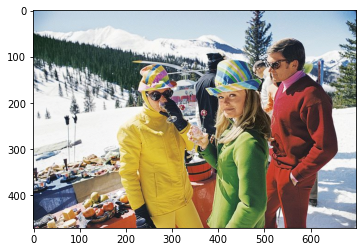

In [31]:
plt.imshow(test_compressed) #Looking good

In [ ]:
test_compressed[0][0].dtype

## Test LAB separation Done!

In [47]:
imgLAB = cv2.cvtColor(test_compressed, cv2.COLOR_RGB2Lab) 

In [48]:
imgLAB[0][0]

array([ 64.07471 ,  -2.9375  , -24.609375], dtype=float32)

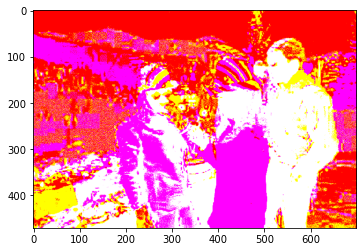

In [49]:
#before scaled
imgLAB = np.clip(imgLAB, 0, 1) #test with RGB compressed np.clip doesn't anything weird, just clips the .43522676
plt.imshow(imgLAB) #look kinda off

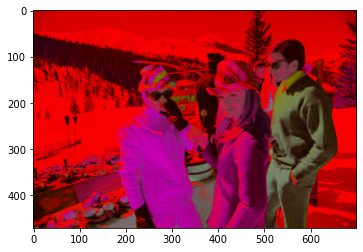

In [41]:
#scaled
imgLAB = imgLAB/np.amax(imgLAB)
imgLAB = np.clip(imgLAB, 0, 1) #test with RGB compressed np.clip doesn't anything weird, just clips the .43522676
plt.imshow(imgLAB) #loook good!

In [42]:
imgLAB[5][10]

array([0.7393799, 0.       , 0.       ], dtype=float32)

## Test Padding

In [44]:
def pad(image):
    
    height = image.shape[0]
    width = image.shape[1]

    WHITE = [255,255,255]
    MAX = 1888
    
    if height % 2 == 0:
        top = int((MAX - height)/ 2)
        bottom = int((MAX - height)/ 2)
    else: 
        top = int((MAX - (height-1))/ 2)
        bottom = int(((MAX - (height-1))/ 2)-1)

    if width % 2 == 0:
        left = int((MAX - width)/ 2)
        right = int((MAX - width)/ 2)
    else: 
        left = int((MAX - (width-1))/ 2)
        right = int(((MAX - (width-1))/2)-1)
    
    image = cv2.copyMakeBorder(image, top, bottom, left, right,
    cv2.BORDER_CONSTANT,value=WHITE)

    return image

In [45]:
padded_image = pad(imgLAB)

In [46]:

Y = padded_image[:, :,1:]
Y = Y / 128 #comment out when show predicted
#Y = Y.tolist()
X = padded_image[:, :, 0] #.tolist()